### Consider a different scalar PDE: Convection-Diffusion equations [Mika Meyer, Kolja Straatman, Pascal Irmer]

Consider the (reaction-)convection-diffusion equation
$$
-\nabla \cdot (\alpha \nabla u) + \beta \cdot \nabla u + \gamma u = f
$$
in $\Omega$, equipped with suitable boundary conditions.

Implement a FEM solver for this problem and carry out numerical experiments to investigate the influence of the convection term on the solution.

Consider the following standard test problem: 
 * Set $ \gamma = 0$, and $\beta = (1,1)$, $\Omega = (0,1)^2$
 * Use homogeneous Dirichlet boundary conditions: $u|_{\partial \Omega} = 0$, see [Dirichlet demo notebook](../demos/dirichlet_2D.ipynb).
 * Consider the so-called mesh Péclét number $Pe = \frac{2 \| \beta \|_\infty}{\gamma h}$, where $h$ is the (initially uniform) mesh size.
 * Take the details as in [this paper, page 19 ff.](https://www.asc.tuwien.ac.at/~schoeberl/wiki/publications/MixedHybridDG.pdf), i.e. take the exact solution and compute (verify) the corresponding r.h.s. and compute the numerical solutions.
 * Implement the (missing) convection integral for $\int_\Omega \beta \cdot \nabla u v \, dx $ in the bilinear form (including tests and notebook(s))
 * Do numerical studies over $h$ and/or $Pe$ with different FE spaces
 * Document the results in proper notebook(s)
 * Use strechted grids (by introducing a mapping in the construction of the mesh) with increasingly small elements towards $x=1$ and $y=1$ and investigate the influence on the solution. (including documentation in notebook(s))


Weak Formulation: $$\int_\Omega \alpha \nabla u \nabla v dx + \int_\Omega  \beta \nabla u v dx +\int_\Omega \gamma u v dx=\int_\Omega fv dx + \int_{\partial\Omega} \alpha \nabla u v ds$$

source module for methodsNM imported.


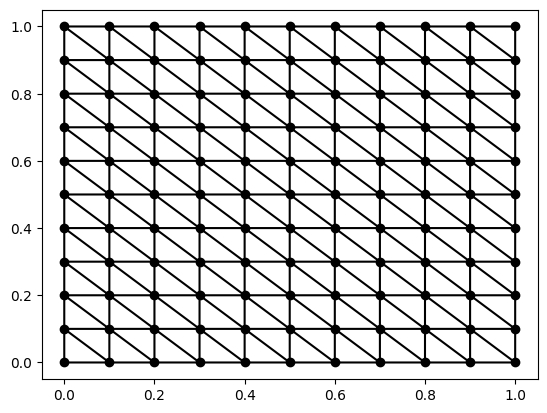

In [1]:
from import_hack import *
from methodsnm.mesh_2d import *
from methodsnm.visualize import *
mesh = StructuredRectangleMesh(10, 10)
DrawMesh2D(mesh)

In [2]:
from methodsnm.fes import *
fes = P3_Triangle_Space(mesh)

In [3]:
from methodsnm.forms import *
from methodsnm.formint import *
from numpy import pi, cos, sin

blf = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf += LaplaceIntegral(c)+ConvectionIntegral(c)
blf.assemble()

lf = LinearForm(fes)
f = GlobalFunction(lambda x: 2 * pi**2 * sin(pi*x[0]) * sin(pi*x[1]), mesh = mesh)
lf += SourceIntegral(f)
lf.assemble()

NameError: name 'ConvectionIntegral' is not defined

In [ ]:
plt.spy(blf.matrix, markersize=4*h)

In [ ]:
dirichlet_mask = np.zeros(fes.ndof,dtype=bool)
for belnr, verts in enumerate(mesh.elements(bndry=True)):
    dirichlet_mask[fes.element_dofs(belnr, bndry=True)]=True
non_dirichlet_mask = np.logical_not(dirichlet_mask)
print(non_dirichlet_mask)    

In [ ]:
A = blf.matrix[non_dirichlet_mask,:][:,non_dirichlet_mask]
b = lf.vector[non_dirichlet_mask]
print(blf.matrix.shape, " -> ", A.shape)

In [ ]:
DrawFunction2D(uh, contour=False)
DrawFunction2D(uh, contour=True)